In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Admission_Predict.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.shape

(400, 8)

In [ ]:
x = df.drop(['Chance of Admit '],axis=1)
y = df['Chance of Admit ']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
r2_score(y_test,rf.predict(x_test))

0.8106872471932208

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Example model
rf = RandomForestRegressor(random_state=42)

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],        # number of trees
    'max_depth': [None, 5, 10, 20],         # tree depth
    'min_samples_split': [2, 5, 10],        # minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],          # minimum samples at a leaf node
    'max_features': ['sqrt', 'log2']        # number of features considered at split
}

grid_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions =param_grid,
    n_iter=10,
    cv=10,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# Fit on training data
grid_search.fit(x_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 5}
Best Score: 0.7574487829527892


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ad = AdaBoostRegressor()
ad.fit(x_train,y_train)

AdaBoostRegressor()

In [ ]:
r2_score(y_test,ad.predict(x_test))

0.8024267525270319

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Base estimator (Decision Tree)
base_estimator = DecisionTreeRegressor(random_state=42)

# AdaBoost Regressor
ada_reg = AdaBoostRegressor(estimator=base_estimator, random_state=42)

# Define parameter distributions
param_dist = {
    'n_estimators': [50, 100, 200, 300, 500],
    'learning_rate': np.linspace(0.01, 2, 20),
    'estimator__max_depth': [2, 3, 4, 5, 6, 8],
    'estimator__min_samples_split': [2, 5, 10],
    'estimator__min_samples_leaf': [1, 2, 4]
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=ada_reg,
    param_distributions=param_dist,
    n_iter=30,
    cv=5,
    scoring='r2',   # or 'neg_mean_squared_error'
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'n_estimators': 500, 'learning_rate': np.float64(0.01), 'estimator__min_samples_split': 10, 'estimator__min_samples_leaf': 1, 'estimator__max_depth': 5}
Best R² Score: 0.7380349613402656


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Model
gbr = GradientBoostingRegressor(random_state=42)

# Define parameter distributions
param_dist = {
    'n_estimators': [100, 200, 300, 500],        # number of boosting stages
    'learning_rate': [0.1,0.3,0.5,0.7], # step size shrinkage
    'max_depth': [2, 3, 4, 5, 6, 8],             # tree depth
    'min_samples_split': [2, 5, 10],             # min samples to split node
    'min_samples_leaf': [1, 2, 4],               # min samples in a leaf
    'subsample': [0.6, 0.8, 1.0],                # fraction of samples
    'max_features': [ 'sqrt', 'log2', None]  # features considered at split
}

# Randomized search
random_search = RandomizedSearchCV(
    estimator=gbr,
    param_distributions=param_dist,
    n_iter=30,                   # number of random combinations
    cv=5,                        # 5-fold CV
    scoring='r2',                # or 'neg_mean_squared_error'
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(x_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best R² Score:", random_search.best_score_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'subsample': 0.8, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 4, 'learning_rate': 0.1}
Best R² Score: 0.7351733336688854


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

In [ ]:
lr = LinearRegression()
lr.fit(x_train,y_train)
r2_score(y_test,lr.predict(x_test))

0.8212082591486993

In [ ]:
r = Ridge()
r.fit(x_train,y_train)
r2_score(y_test,r.predict(x_test))

0.8204337208459432

In [ ]:
l = Lasso()
l.fit(x_train,y_train)
r2_score(y_test,l.predict(x_test))

0.21225769113829052

In [ ]:
kn = KNeighborsRegressor()
kn.fit(x_train,y_train)
r2_score(y_test,kn.predict(x_test))

0.7120978764986885

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
r2_score(y_test,dt.predict(x_test))

0.6780531192990842

[Text(0.5735905124568328, 0.9705882352941176, 'x[5] <= 8.845\nsquared_error = 0.019\nsamples = 320\nvalue = 0.725'),
 Text(0.28049071904292056, 0.9117647058823529, 'x[5] <= 8.11\nsquared_error = 0.011\nsamples = 215\nvalue = 0.658'),
 Text(0.4270406157498767, 0.9411764705882353, 'True  '),
 Text(0.11975826344351258, 0.8529411764705882, 'x[5] <= 7.665\nsquared_error = 0.009\nsamples = 69\nvalue = 0.56'),
 Text(0.06536753823384311, 0.7941176470588235, 'x[0] <= 305.5\nsquared_error = 0.006\nsamples = 23\nvalue = 0.493'),
 Text(0.04785397138628515, 0.7352941176470589, 'x[5] <= 7.655\nsquared_error = 0.004\nsamples = 18\nvalue = 0.471'),
 Text(0.043907252096694625, 0.6764705882352942, 'x[5] <= 7.0\nsquared_error = 0.003\nsamples = 16\nvalue = 0.482'),
 Text(0.03996053280710409, 0.6176470588235294, 'squared_error = 0.0\nsamples = 1\nvalue = 0.36'),
 Text(0.04785397138628515, 0.6176470588235294, 'x[5] <= 7.645\nsquared_error = 0.002\nsamples = 15\nvalue = 0.49'),
 Text(0.036507153428712386, 0

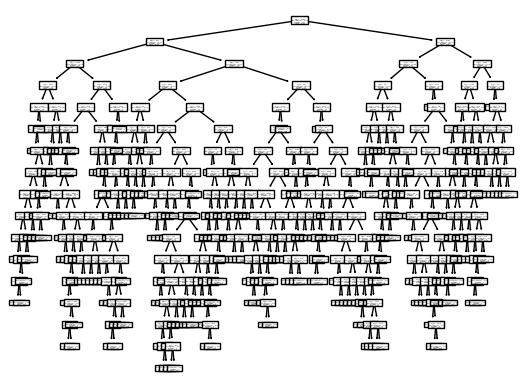

In [ ]:
from sklearn.tree import plot_tree
plot_tree(dt)